In [5]:
!nvidia-smi

zsh:1: command not found: nvidia-smi


In [6]:
import os
WORKSPACE = os.getcwd()
%cd {WORKSPACE}

/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo


In [7]:
!git clone https://github.com/IDEA-Research/GroundingDINO.git

fatal: destination path 'GroundingDINO' already exists and is not an empty directory.


In [8]:
import importlib.util
package = "groundingdino"
spec = importlib.util.find_spec(package)
if spec is None:
    %cd {WORKSPACE}/GroundingDINO
    %pip install -q -e .
    %pip install -q roboflow
else:
    print(spec)

ModuleSpec(name='groundingdino', loader=<_frozen_importlib_external.SourceFileLoader object at 0x106e93be0>, origin='/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/groundingdino/__init__.py', submodule_search_locations=['/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/groundingdino'])


> groundingdino_**swinb**_cogcoor.pth 使用的是 Swin-B (Swin Transformer Base) 作为视觉 backbone。Swin Transformer 是一种将 Transformer 架构应用于计算机视觉任务的模型。与 CNN 相比,Swin Transformer 能更好地捕捉图像的长距离依赖关系。
> groundingdino_**swint**_ogc.pth 使用的是 Swin-T (Swin Transformer Tiny) 作为视觉 backbone。相比 Swin-B,Swin-T 的模型尺寸更小,参数量更少,计算和内存效率更高,但性能可能略低一些。

```python
CONFIG_PATH = os.path.join(WORKSPACE, "GroundingDINO/groundingdino/config/GroundingDINO_SwinB_cfg.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

%cd {WORKSPACE}
!mkdir {WORKSPACE}/weights
%cd {WORKSPACE}/weights

file_path = os.path.join(WORKSPACE, "GroundingDINO/weights/groundingdino_swinb_cogcoor.pth")
if not os.path.exists(file_path):
    !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha2/groundingdino_swinb_cogcoor.pth
```

In [9]:
GROUNDDINO_PATH = os.path.join(WORKSPACE, "GroundingDINO")
CONFIG_PATH = os.path.join(GROUNDDINO_PATH, "groundingdino/config/GroundingDINO_SwinT_OGC.py")
print(CONFIG_PATH, "; exist:", os.path.isfile(CONFIG_PATH))

%cd {GROUNDDINO_PATH}
!mkdir {GROUNDDINO_PATH}/weights
%cd {GROUNDDINO_PATH}/weights

file_path = os.path.join(GROUNDDINO_PATH, "weights/groundingdino_swint_ogc.pth")
if not os.path.exists(file_path):
    !wget -q https://github.com/IDEA-Research/GroundingDINO/releases/download/v0.1.0-alpha/groundingdino_swint_ogc.pth
    print("Downloaded weights")
else:
    print("Weights already exist")

/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/groundingdino/config/GroundingDINO_SwinT_OGC.py ; exist: True
/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO
mkdir: /Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/weights: File exists


/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/weights
Weights already exist


In [10]:
WEIGHTS_NAME = "groundingdino_swint_ogc.pth" # groundingdino_swinb_cogcoor.pth
WEIGHTS_PATH = os.path.join(GROUNDDINO_PATH, "weights", WEIGHTS_NAME)
print(WEIGHTS_PATH, "; exist:", os.path.isfile(WEIGHTS_PATH))

/Users/dylan/Desktop/1Res/osc/ComputerAgentWithVisionRepo/GroundingDINO/weights/groundingdino_swint_ogc.pth ; exist: True


final text_encoder_type: bert-base-uncased


SupervisionWarnings: BoxAnnotator is deprecated: `BoxAnnotator` is deprecated and will be removed in `supervision-0.22.0`. Use `BoundingBoxAnnotator` and `LabelAnnotator` instead


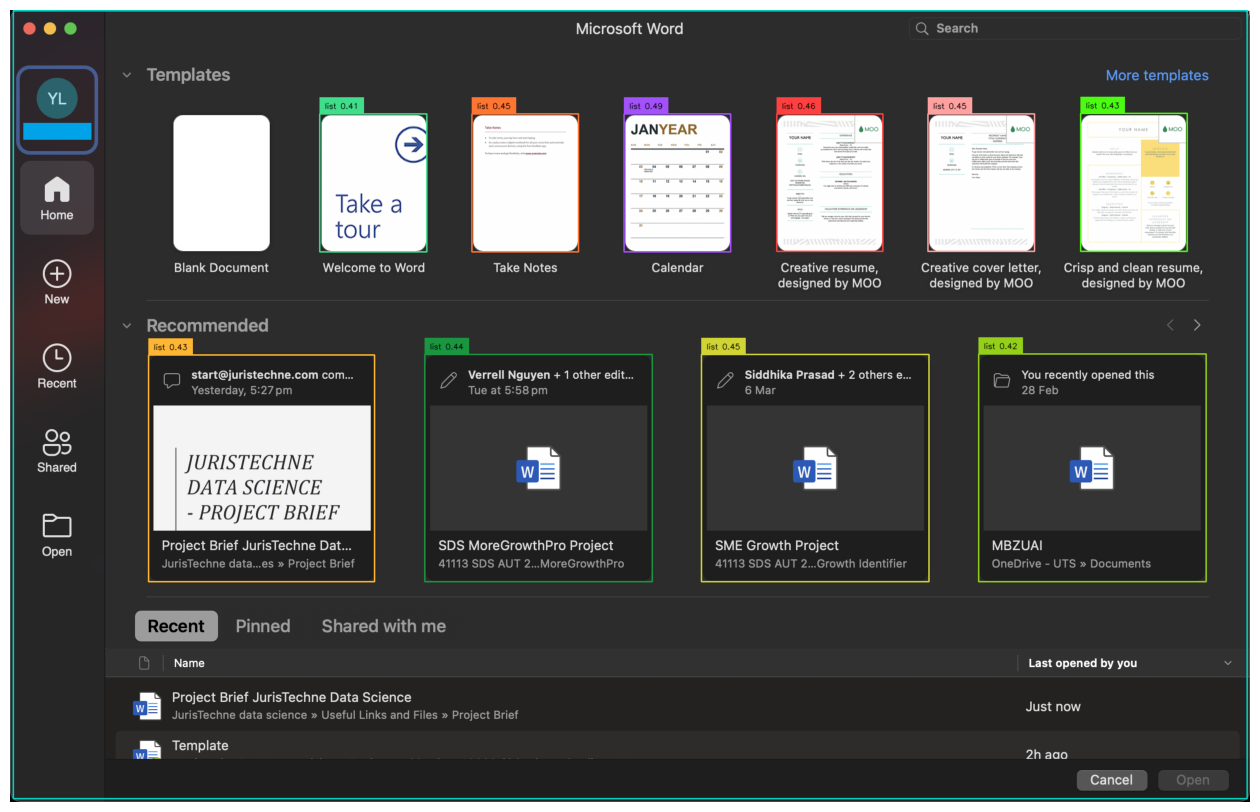

In [11]:
from groundingdino.util.inference import load_model, load_image, predict, annotate
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
model = load_model(CONFIG_PATH, WEIGHTS_PATH, device=device)

TEXT_PROMPT = "List"
BOX_TRESHOLD = 0.35
TEXT_TRESHOLD = 0.25

IMAGE_NAME = "test.png"
IMAGE_PATH = os.path.join(GROUNDDINO_PATH, IMAGE_NAME)
image_source, image = load_image(IMAGE_PATH)
image_source, image = load_image(IMAGE_PATH)

boxes, logits, phrases = predict(
    model=model, 
    image=image, 
    caption=TEXT_PROMPT, 
    box_threshold=BOX_TRESHOLD, 
    text_threshold=TEXT_TRESHOLD,
    device=device
)

annotated_frame = annotate(image_source=image_source, boxes=boxes, logits=logits, phrases=phrases)

import supervision as sv
sv.plot_image(annotated_frame, (16, 16))
